In [2]:
#import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('googleplaystore.csv')

In [4]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
data.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [8]:
data.Category = data.Category.map( {'ART_AND_DESIGN': 0, 'AUTO_AND_VEHICLES': 1, 'BEAUTY': 2,'BOOKS_AND_REFERENCE':3,
                    'BUSINESS':4,'COMICS':5,'COMMUNICATION':6,'DATING':7,'EDUCATION':8,'ENTERTAINMENT':9,
                    'EVENTS':10,'FINANCE':11,'FOOD_AND_DRINK':12,'HEALTH_AND_FITNESS':13,'HOUSE_AND_HOME':14,
                    'LIBRARIES_AND_DEMO':15,'LIFESTYLE':16,'GAME':17,'FAMILY':18,'MEDICAL':19,'SOCIAL':20,
                    'SHOPPING':21,'PHOTOGRAPHY':22,'SPORTS':23,'TRAVEL_AND_LOCAL':24,'TOOLS':25,'PERSONALIZATION':26,
                    'PRODUCTIVITY':27,'PARENTING':28,'WEATHER':29,'VIDEO_PLAYERS':30,'NEWS_AND_MAGAZINES':31,
                    'MAPS_AND_NAVIGATION':32,'1.9':33,} ).astype(float)

In [9]:
data.Category.unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33.])

In [10]:
data["Genres"].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [11]:
genresVal = data["Genres"].unique()
genresValCount = len(genresVal)
genres_dict = {}
for i in range(0,genresValCount):
    genres_dict[genresVal[i]] = i
data["Genres"] = data["Genres"].map(genres_dict).astype(int)

In [12]:
data["Genres"]

0         0
1         1
2         0
3         0
4         2
         ..
10836    13
10837    13
10838    85
10839     6
10840    29
Name: Genres, Length: 10841, dtype: int64

In [13]:
data['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [14]:
data['Content Rating'] = data['Content Rating'].map({'Everyone':0,'Teen':1,'Everyone 10+':2,'Mature 17+':3,
                                                     'Adults only 18+':4}).astype(float)

In [15]:
data['Reviews'] = [ float(i.split('M')[0]) if 'M'in i  else float(i) for i in data['Reviews']]

In [16]:
data["Size"] = [ float(i.split('M')[0]) if 'M' in i else float(0) for i in data["Size"]  ]

In [17]:
data['Price'] = [ float(i.split('$')[1]) if '$' in i else float(0) for i in data['Price'] ]

In [18]:
data.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [19]:
data["Installs"] = [ float(i.replace('+','').replace(',', '')) if '+' in i or ',' in i else float(0) for i in data["Installs"] ]

In [20]:
data.drop(["Last Updated","Current Ver","Android Ver","App","Type"],axis=1,inplace=True)

In [21]:
data["Rating"] = data.groupby("Category")["Rating"].transform(lambda x: x.fillna(x.mean()))

In [22]:
data["Content Rating"] = data[["Content Rating"]].fillna(method="ffill")

In [23]:
data.head()

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres
0,0.0,4.1,159.0,19.0,10000.0,0.0,0.0,0
1,0.0,3.9,967.0,14.0,500000.0,0.0,0.0,1
2,0.0,4.7,87510.0,8.7,5000000.0,0.0,0.0,0
3,0.0,4.5,215644.0,25.0,50000000.0,0.0,1.0,0
4,0.0,4.3,967.0,2.8,100000.0,0.0,0.0,2


In [24]:
data.describe()

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres
count,10841.000000,10841.000000,1.084100e+04,10841.000000,1.084100e+04,10841.000000,10841.000000,10841.000000
mean,17.666544,4.191820,4.441119e+05,18.137312,1.546291e+07,1.027273,0.327092,50.468315
std,7.482708,0.500681,2.927629e+06,22.180798,8.502557e+07,15.948971,0.758964,34.495916
min,0.000000,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,13.000000,4.047411,3.800000e+01,2.600000,1.000000e+03,0.000000,0.000000,19.000000
50%,18.000000,4.259664,2.094000e+03,9.200000,1.000000e+05,0.000000,0.000000,38.000000
75%,23.000000,4.500000,5.476800e+04,26.000000,5.000000e+06,0.000000,0.000000,89.000000
max,33.000000,19.000000,7.815831e+07,100.000000,1.000000e+09,400.000000,4.000000,119.000000


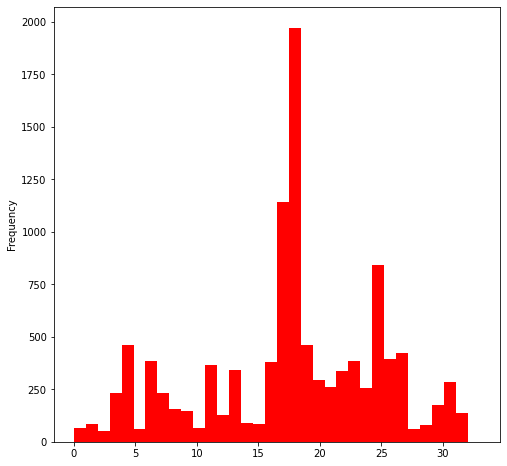

In [25]:
data.Category.plot(kind="hist",color="red",figsize=(8,8),bins=34)
plt.show()

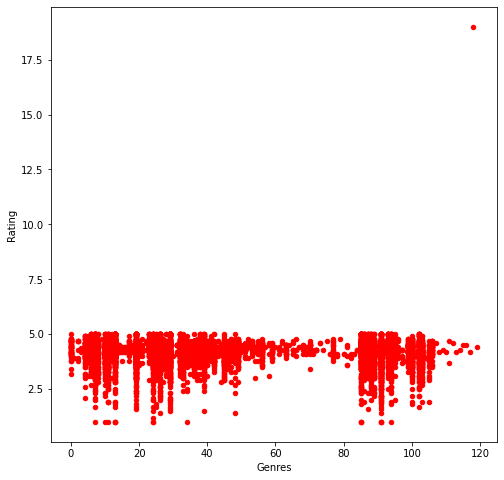

In [26]:
data.plot(kind="scatter",x="Genres",y="Rating",color="red",figsize=(8,8))
plt.show()

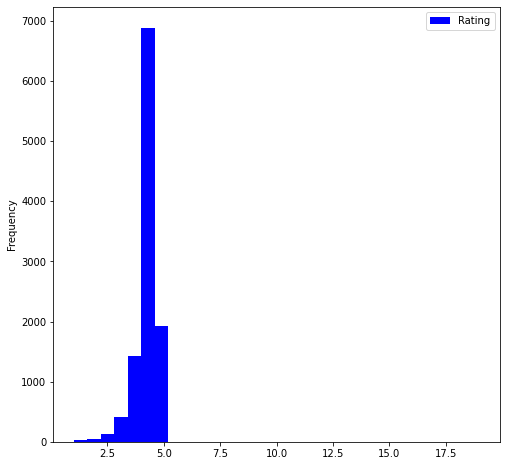

In [27]:
data[["Rating"]].plot(kind="hist",color="blue",figsize=(8,8),bins=30)
plt.show()

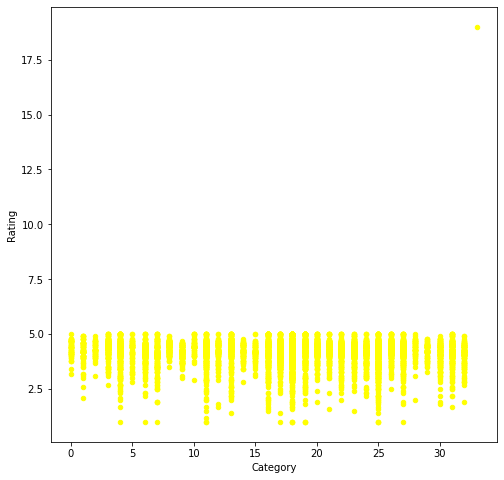

In [28]:
data.plot(kind="scatter",x="Category",y="Rating",color="yellow",figsize=(8,8))
plt.show()

In [29]:
beuty_and_whather_data = data[(data['Category']==2) | (data['Category']==29) ]

In [30]:
beuty_and_whather_data["Rating"].min()

3.1

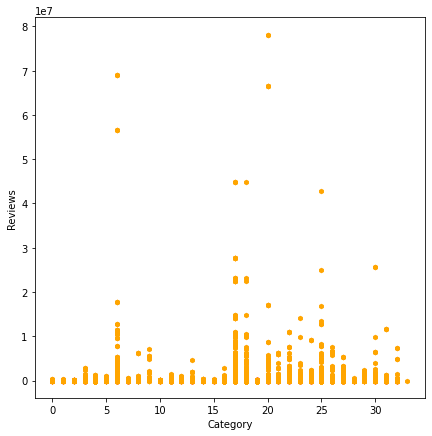

In [31]:
data.plot(kind="scatter",x="Category",y="Reviews",color="orange",marker="h",figsize=(7,7))
plt.show()

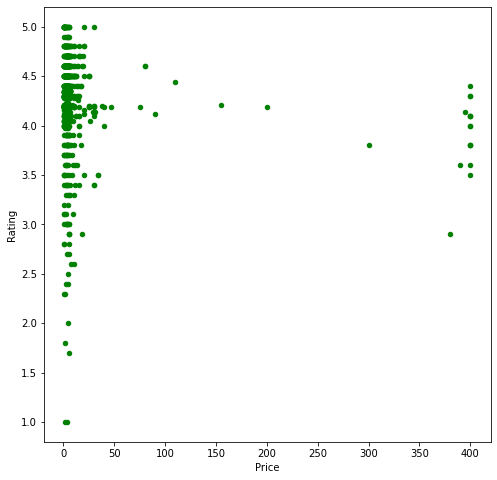

In [32]:
paid_apps = data[data["Price"]!=0]
paid_apps.plot(kind="scatter",x="Price",y="Rating",figsize=(8,8),color="green")
plt.show()

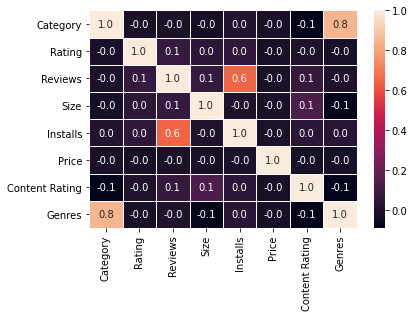

In [33]:
ax = sns.heatmap(data.corr(), annot=True,linewidths=.5,fmt='.1f')
plt.show()

In [34]:
data.describe()

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres
count,10841.000000,10841.000000,1.084100e+04,10841.000000,1.084100e+04,10841.000000,10841.000000,10841.000000
mean,17.666544,4.191820,4.441119e+05,18.137312,1.546291e+07,1.027273,0.327092,50.468315
std,7.482708,0.500681,2.927629e+06,22.180798,8.502557e+07,15.948971,0.758964,34.495916
min,0.000000,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,13.000000,4.047411,3.800000e+01,2.600000,1.000000e+03,0.000000,0.000000,19.000000
50%,18.000000,4.259664,2.094000e+03,9.200000,1.000000e+05,0.000000,0.000000,38.000000
75%,23.000000,4.500000,5.476800e+04,26.000000,5.000000e+06,0.000000,0.000000,89.000000
max,33.000000,19.000000,7.815831e+07,100.000000,1.000000e+09,400.000000,4.000000,119.000000


In [35]:
from sklearn.model_selection import train_test_split
X = data.drop(["Rating"],axis=1)
y = data.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [36]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.fit_transform(X_test)

In [37]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [39]:
neigh = KNeighborsRegressor(n_neighbors=1,metric='chebyshev')
neigh.fit(X_train_scaled, y_train)
knn_pred = neigh.predict(X_test_scaled)
r2_score(y_test, knn_pred)

-0.41996160836848895

In [40]:
mean_squared_error(y_test, knn_pred)

0.4336186691412602

Text(0.5, 0, 'Pred')

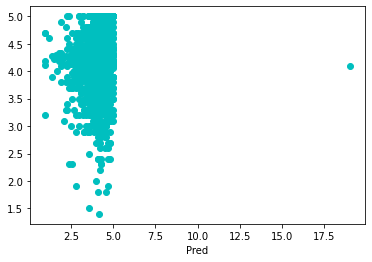

In [41]:
plt.scatter(x=y_test,y=knn_pred,color='c')
plt.xlabel("Pred")